In [1]:
from pylab import *

dimension1 = 30
dimension2 = 30
background = zeros([dimension1,dimension2])
grid = zeros([dimension1, dimension2])
inertia = zeros([dimension1,dimension2])

Input stimulus value: 300


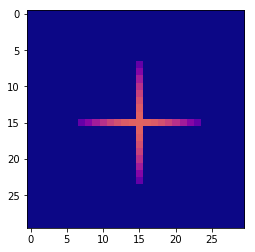

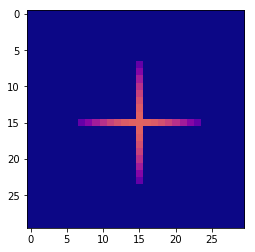

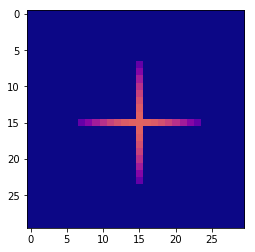

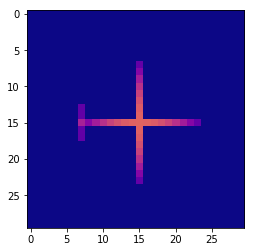

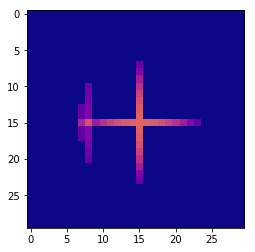

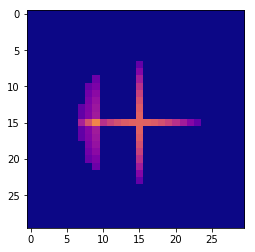

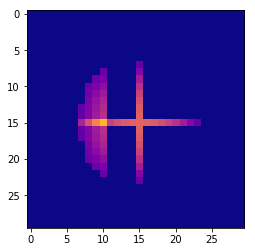

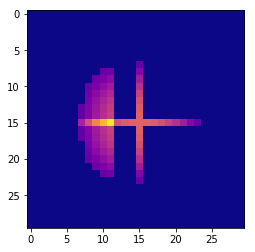

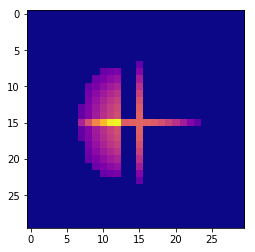

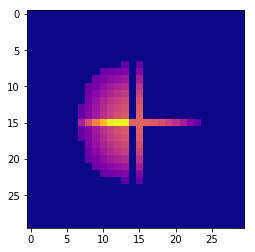

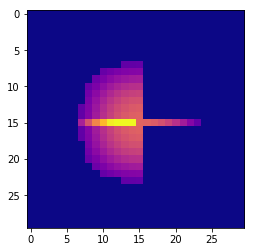

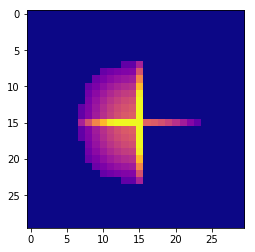

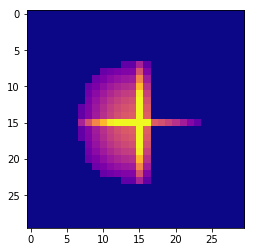

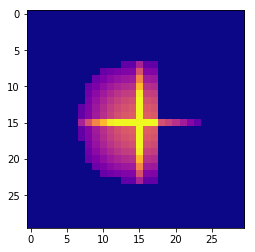

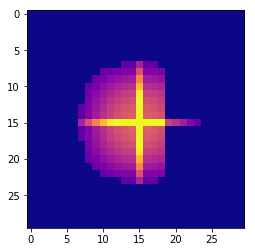

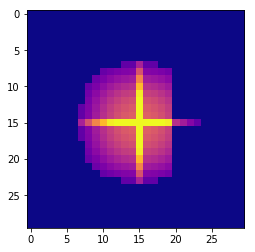

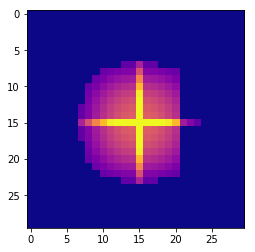

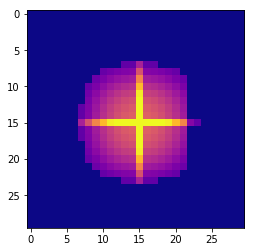

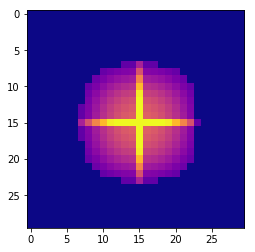

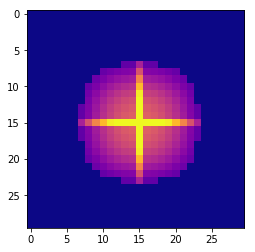

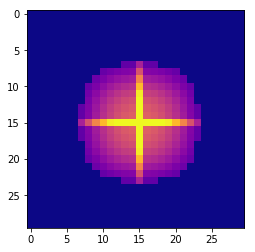

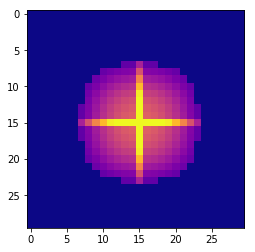

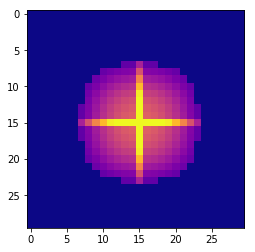

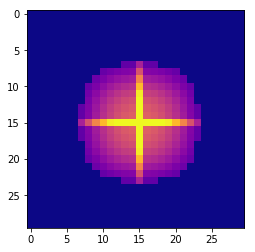

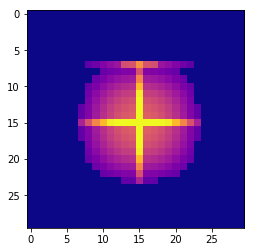

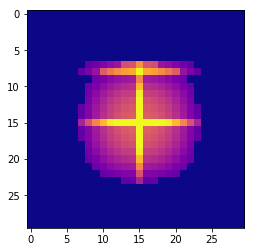

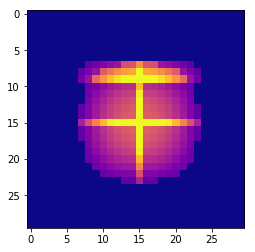

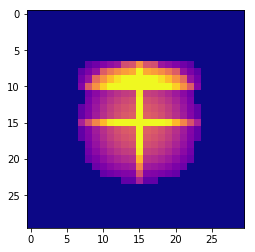

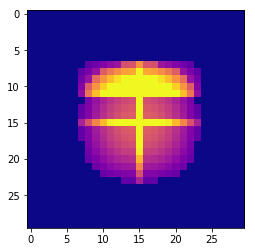

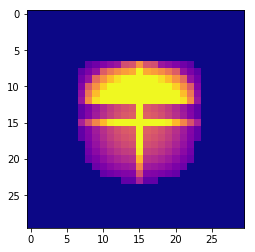

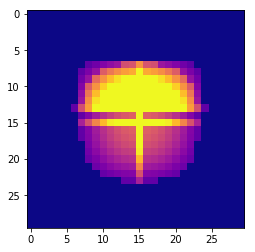

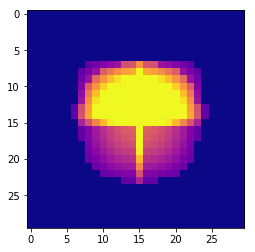

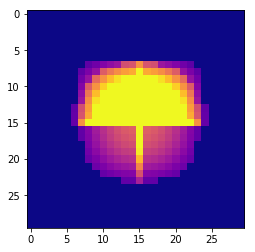

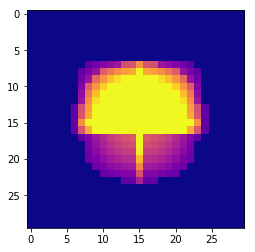

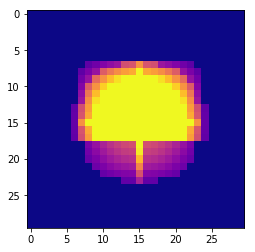

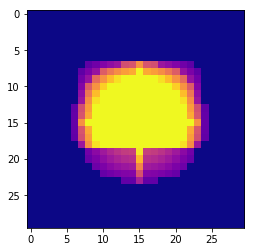

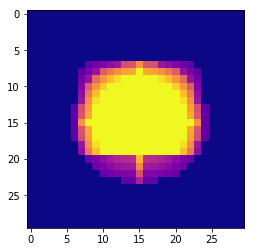

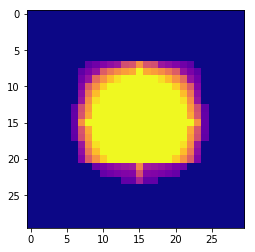

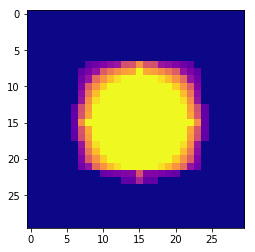

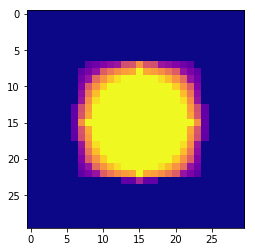

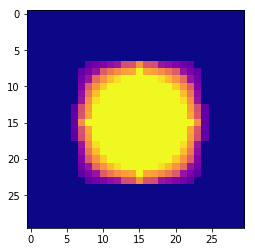

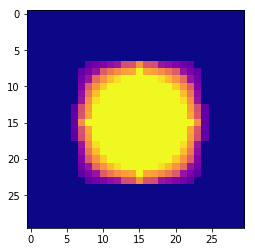

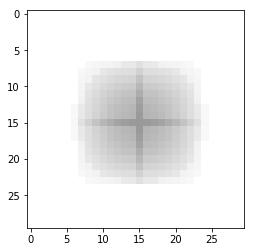

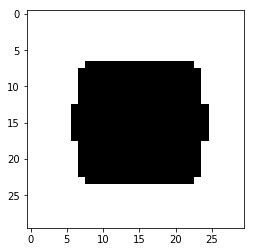

In [74]:
### TODO
### Create boundary conditions for wrappers. The cross properly handles all boundaries, but the wrappers do not.
### The same code can probably be used to evaluate a boundary collision, as the wrapper just uses the cross drawing
### Generate identity matrix. This will probably make the whole system way more portable to C++ or any other language
### that handles arrays in the same manner
### HH



### Let's try this again! This time, we will comment everything..!
### We will make a grid which carries the background, and we will make a separate grid to calculate the input.
### The input grid will be added to the background grid, and only the background grid will be expressed.

### The method this time around is one that starts by determining the radius of our circle.
### A weakness of the previous method was how it handled the values close to the center, which became larger than the center
### due to addition. We will avoid this by calculating by a different method.
### REMEMBER:
###
### The VMAX argument should be at least a few orders of magnitude larger than the largest value expected to appear in the grid

background = zeros([dimension1,dimension2])
grid = zeros([dimension1, dimension2])
inertia = zeros([dimension1,dimension2])

# Start by taking input and determining the radius

stimulus = int(input("Input stimulus value: "))
#stim_x = int(input("Input stimulus x coordinate: "))
#stim_y = int(input("Input stimulus y coordinate: "))
stim_x = 15
stim_y = 15
decay_factor = 1
inner_decay = 1
#filter_factor = float(input("Input filter value: "))
filter_factor = 0.28*stimulus

r = int(ceil(math.log(stimulus, 1.8)))
r_plus = r + 1

# Takes a list as an argument. Returns a list mirrored around the center value.
### The center value does NOT occur twice! ###
def Inverter(l):
    m = []
    for element in l:
        m.append(element)
    m.reverse()
    m.remove(1)
    l.extend(m)
    return l
    

# Let's create the position coefficients for signal decay starting from 0 up to 1.
coefficients = [0]
for i in range(1, r + 1, 1):
    deg_frac = 90 / r
    coefficients.append(math.cos(math.radians(90-(i*deg_frac))))

coefficients = Inverter(coefficients)
coefficients = array(coefficients)*decay_factor
# print("coefficients: {}".format(coefficients))

# Let's start by creating the center tile
# Turns out, y comes first. Fine...

#grid[stim_y][stim_x] = stimulus
#inertia[stim_y][stim_x] = 1

# Let's attempt to draw a straight line with the correct decay in both directions

# This code draws from top to bottom along the gradient. Starting at 0, and ending at 0.
for i, coef in enumerate(coefficients):
    
    if (stim_y + (i-r)) < 0 or (stim_y + (i-r)) > (dimension1 - 1):
        print("y out of bounds at value {}".format(stim_y+(i-r)))
        continue
        
    if stimulus*coef > filter_factor:
        grid[stim_y+(i-r)][stim_x] = stimulus * coef
        inertia[stim_y+(i-r)][stim_x] = stimulus * coef


# This code draws from left to right along the gradient. Starting at 0, and ending at 0.
for i, coef in enumerate(coefficients):
    
    if (stim_x + (i-r)) < 0 or (stim_x + (i-r)) > (dimension1 - 1):
        print("x out of bounds at value {}".format(stim_y+(i-r)))
        continue
        
    if stimulus*coef > filter_factor:
        grid[stim_y][stim_x+(i-r)] = stimulus * coef
        inertia[stim_y][stim_x+(i-r)] = stimulus * coef



# Let's create the normally (90 degrees) oriented extensions from the cross. These produce a circle-like appearance.
# We'll start by reading in the x direction, and writing in the y_direction.

for x in range(len(coefficients)):
    plt.imshow(grid, cmap='plasma', interpolation='None', vmin = 0, vmax= 500)
    plt.show()

    # Border control. Stops the program from trying to keep on writing after an edge is detected.
    if (stim_x+(x-r)) >= dimension2:
        print("Edge found at x: %i, core coordinate %i" % (x, ((x-r)+stim_x)))
        break
    
    #The core coordinate is the value that seeds each expansion
    core_coordinate = grid[stim_y][stim_x+(x-r)]
    for i, coef in enumerate(coefficients):
        
        #Trying some border control for the wrapper
        if (stim_y + (i-r)) < 0 or (stim_y + (i-r)) > (dimension1 - 1):
            print("y out of bounds at value {}".format(stim_y+(i-r)))
            continue
        
        if (core_coordinate*(coef*inner_decay) > filter_factor):
            grid[stim_y+(i-r)][stim_x+(x-r)] += core_coordinate*coef
            inertia[stim_y+(i-r)][stim_x+(x-r)] += core_coordinate*coef


# Let's implement the y direction before applying any filtering. Hopefully, then end result is an identity matrix.
# A good identity matrix can save a lot of computation at a later stage and is a great empirical tool.

for y in range(len(coefficients)):
    plt.imshow(grid, cmap='plasma', interpolation='None', vmin = 0, vmax= 500)
    plt.show()
    
    # Border control. Stops the program from trying to keep on writing after an edge is detected.
    if (stim_y+(y-r)) >= dimension1:
        print("Edge found at y: %i, core coordinate %i" % (y, ((y-r)+stim_y)))
        break
    
    #The core coordinate is the value that seeds each expansion
    core_coordinate = grid[stim_y+(y-r)][stim_x]
    for i, coef in enumerate(coefficients):
        
        # x-direction border control
        if (stim_x + (i-r)) < 0 or (stim_x + (i-r)) > (dimension1 - 1):
            print("y out of bounds at value {}".format(stim_y+(i-r)))
            continue
        
        if core_coordinate*(coef*inner_decay) > filter_factor:
            grid[stim_y+(y-r)][stim_x+(i-r)] += core_coordinate*coef
            inertia[stim_y+(y-r)][stim_x+(i-r)] += core_coordinate*coef
            

plt.imshow(grid, cmap='binary', interpolation='None', vmin = 0, vmax= 3000)
plt.show()
plt.imshow(inertia, cmap='binary', interpolation='None', vmin=0, vmax=1)
plt.show()

In [24]:
len(coefficients)

12

In [42]:
dimension2

30

In [72]:
print(grid)

[[   0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.            0.
     0.            0.            0.           

In [43]:
41/150

0.2733333333333333

In [49]:
19.54/60

0.32566666666666666

In [69]:
150*0.7

105.0